# NB Setup

In [129]:
import os
import requests
import datetime
import yfinance as yf
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import mplfinance as mpf
import numpy as np
import pandas as pd


data_folder = "nb_matplotlib_data"
data_path = os.path.join(os.getcwd(), data_folder)

file_paths_and_url = {
    "icecreamsales.csv": "https://raw.githubusercontent.com/sebastianpacurar/ai-ds-projects/refs/heads/data_sets/data_sets/icecreamsales.csv",
}

def path_to(f_path):
    return os.path.join(data_path, f_path)

# create root folder for this notebook's data sets
def create_data_sets_folder():
    if not os.path.exists(data_path):
        os.makedirs(data_path)
        print(f"Folder {data_path} created in {os.getcwd()}")
    else:
        print(f"Folder {data_path} already exists in {os.getcwd()}")

# download data set files from github repos, and store them in data_path
def download_raw_git_files():
    for f_name, f_url in file_paths_and_url.items():
        f_path = os.path.join(data_path, f_name)
        if not os.path.exists(f_path):
            res = requests.get(f_url)
            with open(f_path, "wb") as file:
                file.write(res.content)
            print(f"File \"{f_name}\" downloaded in {data_path}")
        else:
            print(f"Skip File \"{f_name}\"; already exists in {data_path}")

def load_csv_data_set(f_path):
    try:
        df = pd.read_csv(path_to(f_path))
        print(f'Loaded "{f_path}" to Dataframe')
        return df
    except:
        print(f'Something went wrong with loading the "{f_path}"')

# download data sets if they don't exist
create_data_sets_folder()
download_raw_git_files()

# load data sets into data frames for sample use
ice_cream_sales = load_csv_data_set("icecreamsales.csv")

# load data from yahoo finance about Google Stocks
yahoo_data = yf.download("GOOG", start="2024-01-01", end="2025-01-01")

[*********************100%***********************]  1 of 1 completed

Folder C:\Users\pacur\Documents\git\ai-ds-projects\study_materials\matplotlib\nb_matplotlib_data already exists in C:\Users\pacur\Documents\git\ai-ds-projects\study_materials\matplotlib
Skip File "icecreamsales.csv"; already exists in C:\Users\pacur\Documents\git\ai-ds-projects\study_materials\matplotlib\nb_matplotlib_data
Loaded "icecreamsales.csv" to Dataframe


# Basics

## Functional Plot

Text(0, 0.5, 'Days Squared')

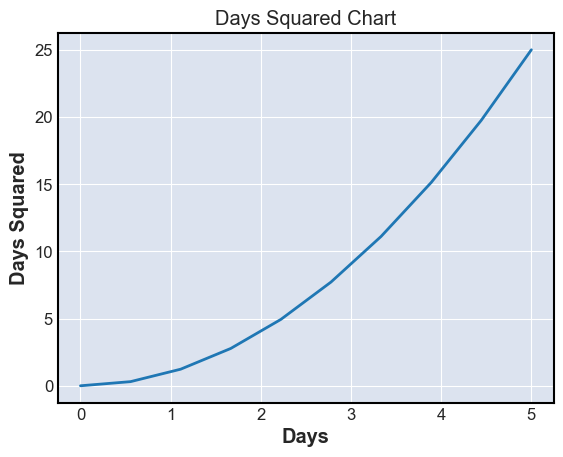

In [132]:
# Functional Plot
x = np.linspace(0, 5, 10) # generate 10 floats from 0 to 5
y = x**2
plt.plot(x, y)
plt.grid(True)
plt.title('Days Squared Chart')
plt.xlabel('Days')
plt.ylabel('Days Squared')

## Figure Objects

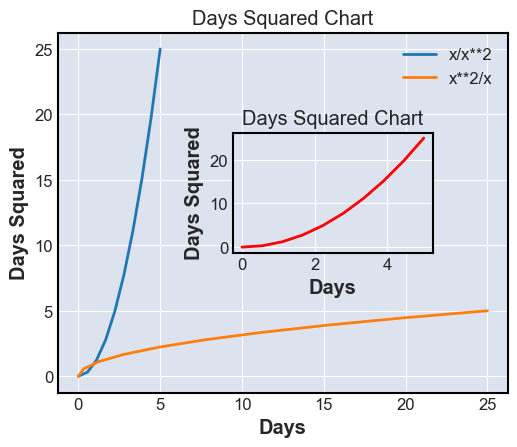

In [134]:
# Using Figure Objects
fig_1 = plt.figure(figsize=(5 ,4), dpi=100)
axes_1 = fig_1.add_axes([0.1, 0.1, 0.9, 0.9])
axes_1.set_xlabel('Days')
axes_1.set_ylabel('Days Squared')
axes_1.set_title('Days Squared Chart')
axes_1.plot(x,y,label='x/x**2')
axes_1.plot(y,x,label='x**2/x')
axes_1.legend(loc=0)

# inner plot
axes_2 = fig_1.add_axes([0.45, 0.45, 0.4, 0.3])
axes_2.set_xlabel('Days')
axes_2.set_ylabel('Days Squared')
axes_2.set_title('Days Squared Chart')
axes_2.plot(x,y, 'r')

## Subplots

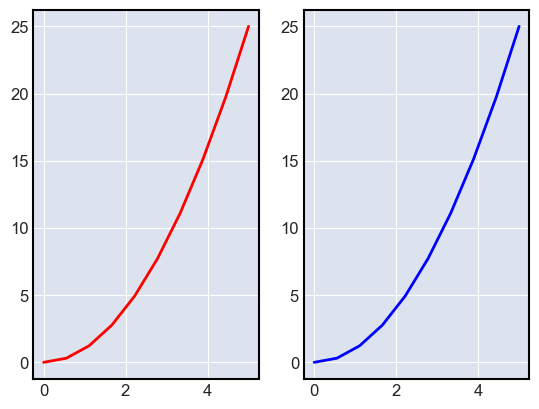

In [136]:
# Print multiple plots
plt.subplot(1,2,1)
plt.plot(x,y, 'r')

plt.subplot(1,2,2)
plt.plot(x,y, 'b')

plt.show()

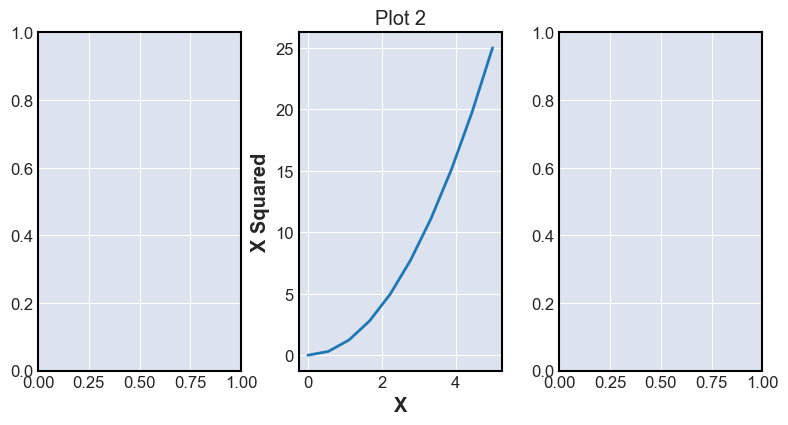

In [137]:
# subplots organized

fig_2, axes_2 = plt.subplots(figsize=(8,4), nrows=1, ncols=3)
plt.tight_layout()
axes_2[1].set_title('Plot 2')
axes_2[1].set_xlabel('X')
axes_2[1].set_ylabel('X Squared')
axes_2[1].plot(x,y)

plt.show()

## Appearance Options

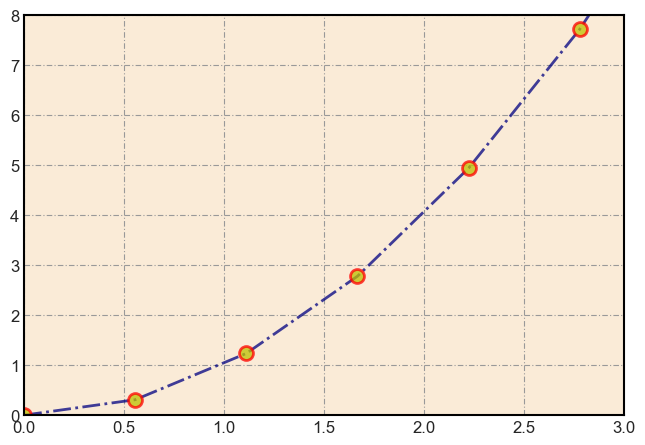

In [139]:
# Appearance options
fig_3 = plt.figure(figsize=(6,4))
axes_3 = fig_3.add_axes([0,0,1,1])
axes_3.plot(x, y, color='navy', alpha=.75, lw=2, ls='-.', marker='o', markersize=10,
           markerfacecolor='y', markeredgecolor='r', markeredgewidth=2)

# how to zoom:
axes_3.set_xlim([0, 3])
axes_3.set_ylim([0, 8])

# add grid in the background
axes_3.grid(True, color='0.6', dashes=(5,2,1, 2))

# change the background color for our grid pattern
axes_3.set_facecolor('#FAEBD7')

plt.show()

## Plotting DataFrame info

,Temperature,Sales
0,37,292
1,40,228
11,42,320
2,49,324
10,53,324
3,61,376
9,64,412
4,72,440
8,75,496
5,79,496


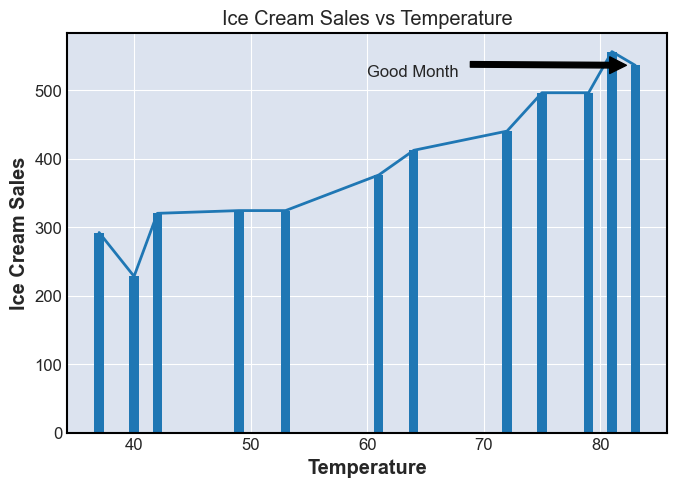

In [141]:
ice_df_sample = ice_cream_sales.copy()
sorted_ice = ice_df_sample.sort_values(by='Temperature', ascending=True)
display(sorted_ice)

np_arr = sorted_ice.values # convert data frame to an np array
x = np_arr[:,0] # get first column of information (Temperature)
y = np_arr[:,1] # get second column of information (Sales)
fig = plt.figure(figsize=(6,4))
axes = fig.add_axes([0,0,1,1])
axes.set_xlabel('Temperature')
axes.set_ylabel('Ice Cream Sales')
axes.set_title('Ice Cream Sales vs Temperature')
axes.grid(True)
axes.plot(x,y)

# arrow annotation
axes.annotate('Good Month', xy=(83,536), xytext=(60, 520),
              arrowprops=dict(facecolor='black', shrink=0.05))

# add plot bars
plt.bar(x, y)
plt.show()

## TeX Markup

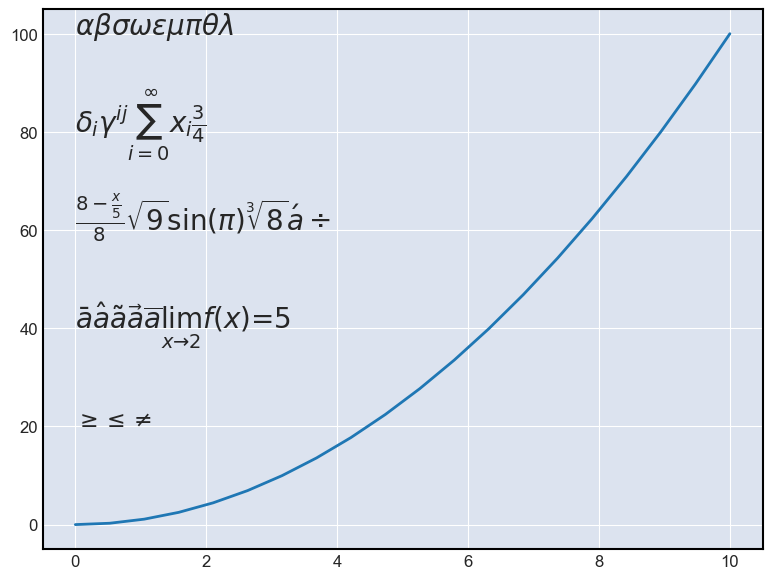

In [143]:
# TeX Markup

x = np.linspace(0, 10, 20)
y = x**2

fig = plt.figure(figsize=(8,6), dpi=100)
axes = fig.add_axes([0.1, 0.1, 0.9, 0.9])

axes.text(0,100, r"$\alpha \beta \sigma \omega \epsilon \mu \pi \theta \lambda$", fontsize=20)

axes.text(0,80, r"$\delta_i \gamma^{ij} \sum_{i=0}^\infty x_i \frac{3}{4}$", fontsize=20)

axes.text(0, 60, r"$\frac{8 - \frac{x}{5}}{8} \sqrt{9} \sin(\pi) \sqrt[3]{8} \acute a \div$", fontsize=20)

axes.text(0, 40, r"$\bar a \hat a \tilde a \vec a \overline {a} \lim_{x \to 2} f(x) = 5$", fontsize=20)

axes.text(0, 20, r"$\geq \leq \ne$", fontsize=16)

axes.plot(x, y)
plt.show()

## Histogram

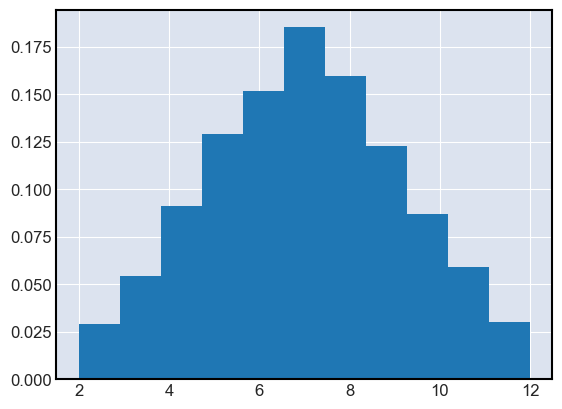

In [145]:
# Plot a histogram to highlight the chances of a number to be between 1 and 6 out of 10000 tries

arr_1 = np.random.randint(1,7,5000)
arr_2 = np.random.randint(1,7,5000)
arr_3 = arr_1 + arr_2

# bins = number of bars
# density = returns the frequency of each of the bins
plt.hist(arr_3, bins=11, density=True, stacked=True)
plt.grid(True)
plt.show()

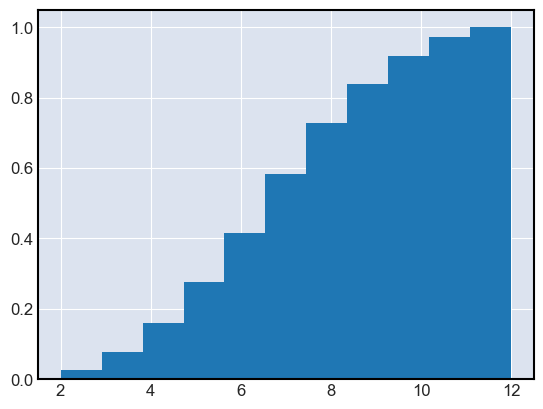

In [146]:
# cumulative = use a cumulative distribution
plt.hist(arr_3, bins=11, density=True, stacked=True, cumulative=True)
plt.grid(True)
plt.show()

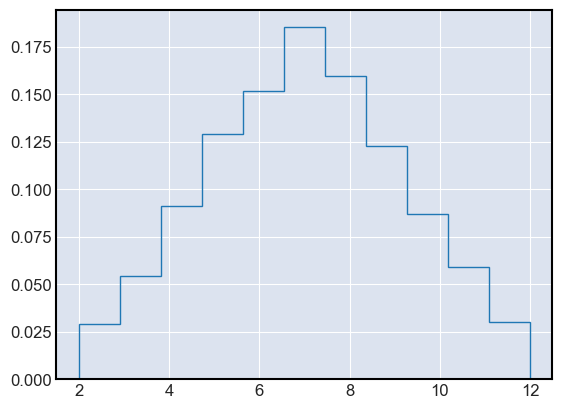

In [147]:
# histtype='step' generates a line plot
plt.hist(arr_3, bins=11, density=True, stacked=True, histtype='step')
plt.grid(True)
plt.show()

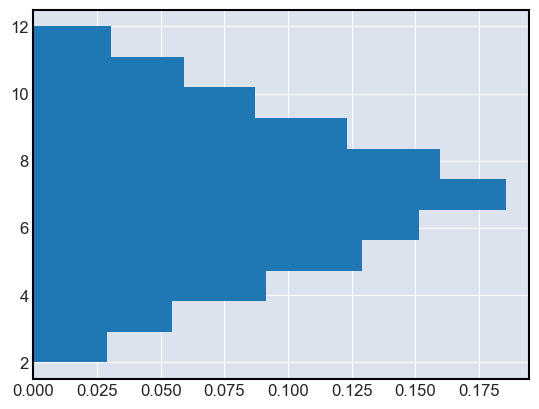

In [148]:
# orientation = 'vertical' or 'horizontal'
plt.hist(arr_3, bins=11, density=True, stacked=True, orientation='horizontal')
plt.grid(True)
plt.show()

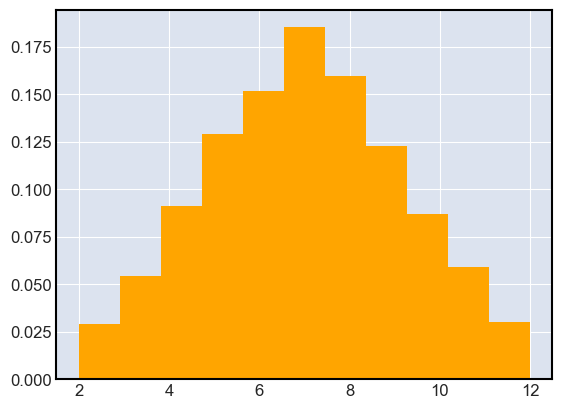

In [149]:
# color = change bars color
plt.hist(arr_3, bins=11, density=True, stacked=True, color='orange')
plt.grid(True)
plt.show()

## Bar Charts

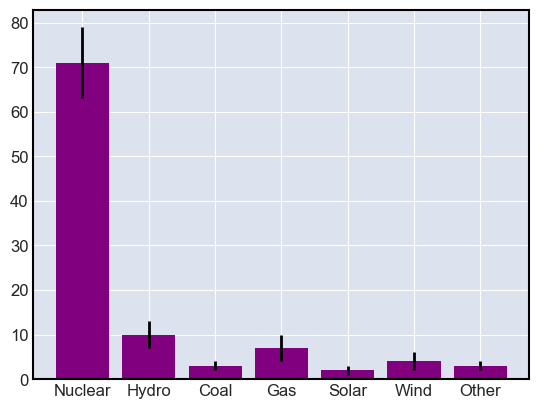

In [151]:
# go through the percentages of how France gets its electricity

x = ["Nuclear", "Hydro", "Coal", "Gas", "Solar", "Wind", "Other"]
per_1 = [71, 10, 3, 7, 2, 4, 3]  # percentage
variance = [8, 3, 1, 3, 1, 2, 1] # variance per year
plt.bar(x, per_1, color="purple", yerr=variance)
plt.grid(True)
plt.show()

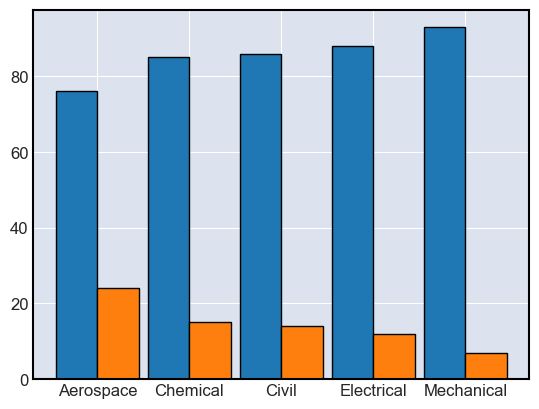

In [152]:
# go through the percentages for males and females in the different branches of engineering

m_eng = (76, 85, 86, 88, 93)        # male engineers
f_eng = (24, 15, 14, 12, 7)         # female engineers
evenly_spaced_values = np.arange(5) # iteration index

plt.bar(evenly_spaced_values, m_eng, width=0.45, label="Male", edgecolor="k")
plt.bar(evenly_spaced_values + 0.45, f_eng, width=0.45, label="Female", edgecolor="k")
plt.xticks(evenly_spaced_values + 0.45 / 2, ("Aerospace", "Chemical", "Civil", "Electrical", "Mechanical"))
plt.grid(True)
plt.show()

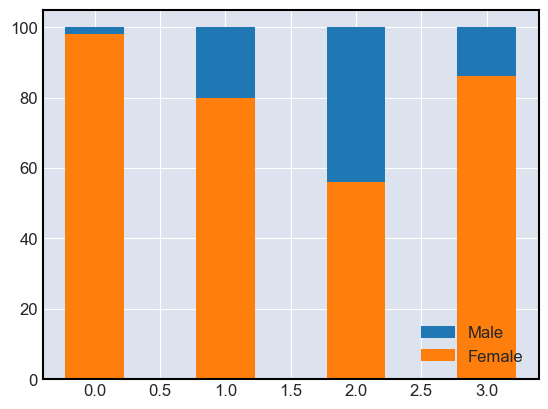

In [153]:
# Stacked Bar Chart

t_type = ["Kindergarden", "Elementary School", "Secondary School", "Special School"]
m_teach = np.array([2, 20, 44, 14])
f_teach = np.array([98, 80, 56, 86])
index = [x for x, _ in enumerate(t_type)]

plt.bar(index, m_teach, width=0.45, label="Male", bottom=f_teach)
plt.bar(index, f_teach, width=0.45, label="Female")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## Pie Charts

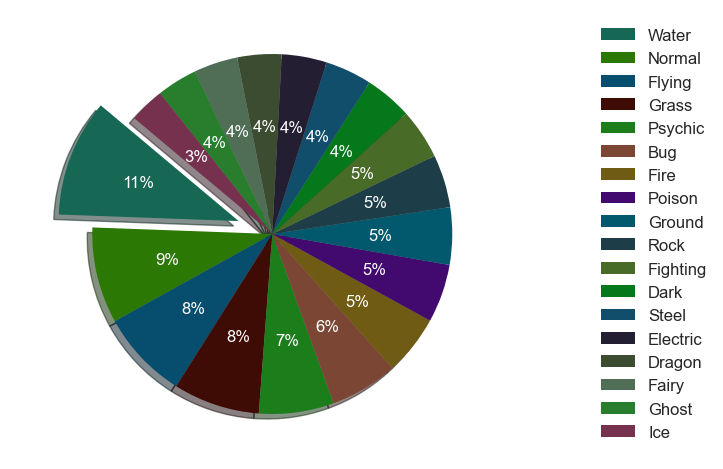

In [155]:
# create a pie chart of the number of pokemon by type

fig = plt.figure(figsize=(8,5), dpi=100)
axes = fig.add_axes([0.1, 0.1, 0.9, 0.9])

types = ["Water", "Normal", "Flying", "Grass", "Psychic", "Bug", "Fire", "Poison", "Ground",
         "Rock", "Fighting", "Dark", "Steel", "Electric", "Dragon", "Fairy", "Ghost", "Ice"]
poke_num = [133, 109, 101, 98, 85, 77, 68, 66, 65, 60, 57, 54, 53, 51, 50, 50, 46, 40]

colors = []

# generate different colors for the pie slices
for i in range(18):
    colors.append((np.random.uniform(0, .5), np.random.uniform(0, .5), np.random.uniform(0, .5)))

# explode sizes
explode = [0] * 18
explode[0] = 0.2 # explode the first item with 0.2 out of the pichart

wedges, texts, autotexts = plt.pie(poke_num,
                                   explode=explode,
                                   labels=types,
                                   colors=colors,
                                   autopct="%1.0f%%",
                                   shadow=True,
                                   startangle=140,
                                   textprops=dict(color="w"))
plt.legend(wedges, types, loc="right", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

## Timeseries

In [157]:

yahoo_data_sample = yahoo_data.copy()
yahoo_data_sample.info()

yahoo_data_sample.head(1), yahoo_data_sample.tail(1)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2024-01-02 to 2024-12-31
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, GOOG)   252 non-null    float64
 1   (High, GOOG)    252 non-null    float64
 2   (Low, GOOG)     252 non-null    float64
 3   (Open, GOOG)    252 non-null    float64
 4   (Volume, GOOG)  252 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.8 KB


(Price            Close        High         Low        Open    Volume
 Ticker            GOOG        GOOG        GOOG        GOOG      GOOG
 Date                                                                
 2024-01-02  139.060349  140.111579  137.246872  139.100214  20071900,
 Price            Close    High         Low        Open    Volume
 Ticker            GOOG    GOOG        GOOG        GOOG      GOOG
 Date                                                            
 2024-12-31  190.440002  193.25  189.580002  192.445007  14355200)

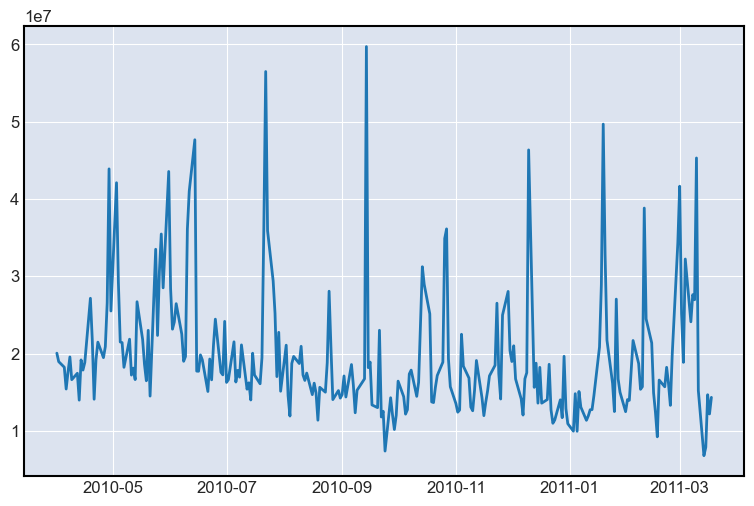

In [158]:
df_to_np = yahoo_data_sample.to_numpy()
y = df_to_np[:, 4]

holidays = [datetime.datetime(2024,12,24), datetime.datetime(2024, 12, 31)]
date_arr = pd.bdate_range(start="4/1/2010", end="31/12/2024", freq="C", holidays=holidays)
x = date_arr[:len(y)].to_numpy()

fig = plt.figure(figsize=(8,5))
axes = fig.add_axes([0.1, 0.1, 0.9, 0.9])

plt.plot(x, y)
plt.grid(True)
plt.show()

## Tables

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2024-01-02,139.060349,140.111579,137.246872,139.100214,20071900
2024-01-03,139.857483,140.584865,137.934385,138.103790,18974300
2024-01-04,137.545776,140.131487,137.515885,139.349309,18253300
2024-01-05,136.898117,138.313031,136.360057,137.856679,15433200
2024-01-08,140.026855,140.136462,137.386349,137.505915,17645300
...,...,...,...,...,...
2024-12-24,197.570007,197.669998,195.197998,196.169998,6809800
2024-12-26,197.100006,198.160004,195.869995,196.740005,7907900


,Close,High,Low,Open,Volume
Date,,,,,
2024-12-24,197.57,197.67,195.20,196.17,6809800
2024-12-26,197.10,198.16,195.87,196.74,7907900
2024-12-27,194.04,196.80,191.97,196.47,14693000
2024-12-30,192.69,193.78,190.36,190.87,12209500
2024-12-31,190.44,193.25,189.58,192.45,14355200


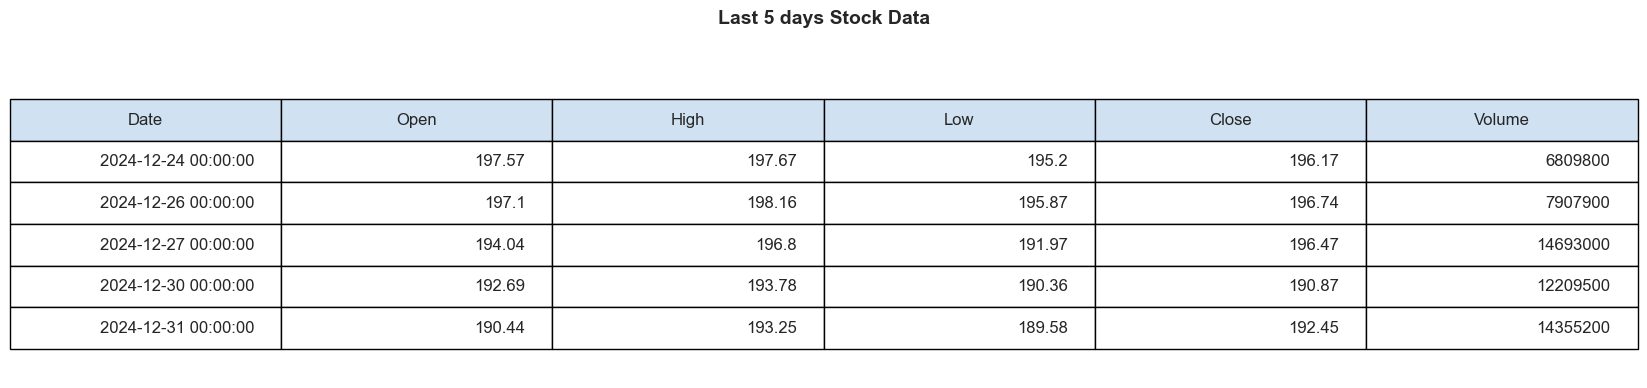

In [160]:
df = yahoo_data.copy()
display(df)
df.columns = [col[0] for col in df.columns]
df.index = pd.to_datetime(df.index)
df.index.name = "Date"

# perform round to 2 digits, after the float's dot, for all cols except "Volume"
for col in df.columns:
    if col == "Volume":
        continue
    df[col] = pd.Series([round(val, 2) for val in df[col]], index=df.index)

# get recent last days of stock data
stock_data = df[-5:]
display(stock_data)

# define headers for the table
col_head = ("Date", "Open", "High", "Low", "Close", "Volume")

# reset index of stock_data and convert stock_data to numpy
stock_data_np = stock_data.reset_index().to_numpy()

# plot the figure with a .5 padding from all sides
plt.figure(figsize=(7,4), linewidth=2)

# get rid of the whole plot which gets generated above the table
axes = plt.gca() # get current axes
axes.get_xaxis().set_visible(False) # hide X axis
axes.get_yaxis().set_visible(False) # hide Y axis
plt.box(on=None) # get rid of the plot box

# create color map
colors = plt.cm.Blues(np.full(len(col_head), 0.2))

# create table
table = plt.table(cellText=stock_data_np, loc="center", colLabels=col_head,
                  colColours=colors)

# scale table
table.scale(3, 2.5)

# add title
plt.text(0.5, 1.15, "Last 5 days Stock Data", fontsize=14, fontweight="bold", ha="center", transform=plt.gca().transAxes)
plt.show()

## Scatterplot

In [162]:
# country array
c_arr = np.array([
    "Australia", "Brazil", "Canada", "Chile", "France", "Germany", "Greece",
    "Iceland", "India", "Iran", "Italy", "Mexico", "New Zealand", "Nigeria",
    "Norway", "Pakistan", "Peru", "Russia", "Saudi Arabia", "Singapore",
    "South Africa", "Spain", "Sweden", "Turkey", "UK", "US"
])

# death rate per 100k Coronavirus
dr_arr = np.array([
    1.8, 53, 24.5, 56.5, 45.4, 11.2, 2.2,
    2.8, 4, 24.6, 58.6, 0.5, 0.5,
    4.9, 2.9, 83.3, 11, 10.4, 0.5,
    21.5, 61.6, 33.3, 56.9, 7.3, 62.4, 52.9
])

# daily confirmed cases (tests)
test_arr = np.array([
    110, 7197, 600, 1862, 1636, 1103, 35,
    10, 295, 1658, 1226, 2490, 8, 243,
    48, 1395, 1101, 4447, 1443, 280,
    2830, 1602, 447, 1205, 1546, 24988
])

# dot size Confirmed cases
cc_arr = np.array([
    24236, 345652, 125408, 390037, 256534, 229706, 7684,
    2035, 283695, 350279, 255278, 537031, 1654, 50488,
    10162, 290845, 549321, 935066, 302686, 56031,
    596060, 370867, 85411, 253108, 323008, 552824
])

(26, 26, 26, 26)

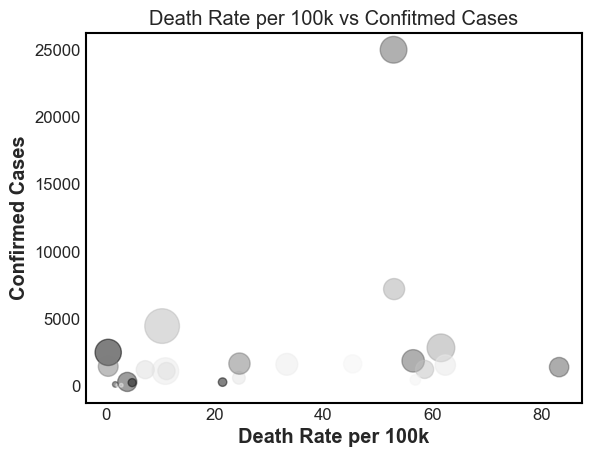

In [243]:
len(c_arr), len(dr_arr), len(test_arr), len(cc_arr)
cc_arr_sm = cc_arr / 1500 # make the size of the dots smaller
color_arr = np.random.rand(26)

plt.figure(facecolor='white') 
plt.gca().set_facecolor("white")

plt.title("Death Rate per 100k vs Confitmed Cases")
plt.xlabel("Death Rate per 100k")
plt.ylabel("Confirmed Cases")

 # "s" stands for size
 # "c" stands for color
plt.scatter(dr_arr, test_arr, s=cc_arr_sm, c=color_arr, alpha=0.5)
plt.show()

## 3D Surfaces

In [165]:
# used for getting a wave like distribution on the z axis.
def get_z(x, y):
    return np.sin(np.sqrt(x**2 + y**2))

### Scatter Plot

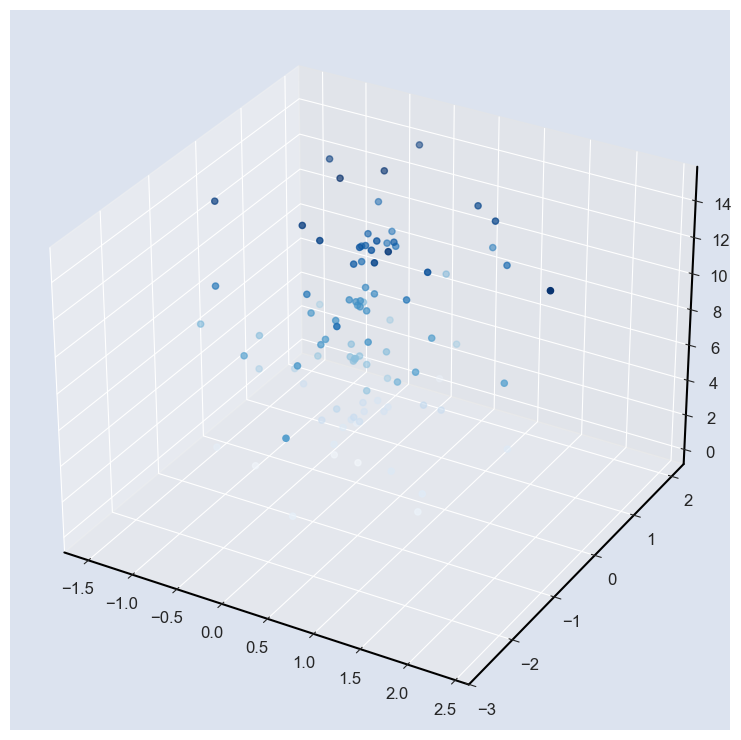

In [167]:
fig = plt.figure(figsize=(16, 8), dpi=100)
axes = fig.add_axes([0.1, 0.1, 0.9, 0.9], projection="3d")

z = 15 * np.random.random(100)
x = np.sin(z) * np.random.randn(100)
y = np.sin(z) * np.random.randn(100)
axes.scatter3D(x, y, z, c=z, cmap="Blues")
plt.show()

### Contour Plot

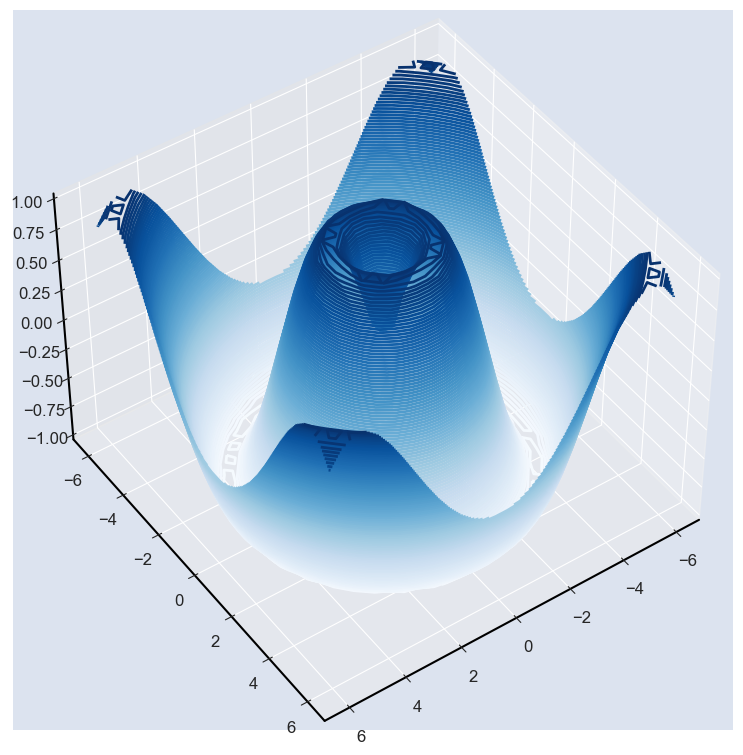

In [169]:
fig = plt.figure(figsize=(16, 8), dpi=100)
axes = fig.add_axes([0.1, 0.1, 0.9, 0.9], projection="3d")

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

x, y = np.meshgrid(x, y)
z = get_z(x,y)

# change viewing angle at 45 degrees, and rotate at 55 degrees
axes.view_init(45, 55)
axes.contour3D(x, y, z, 100, cmap="Blues")
plt.show()

### Wireframe Plot

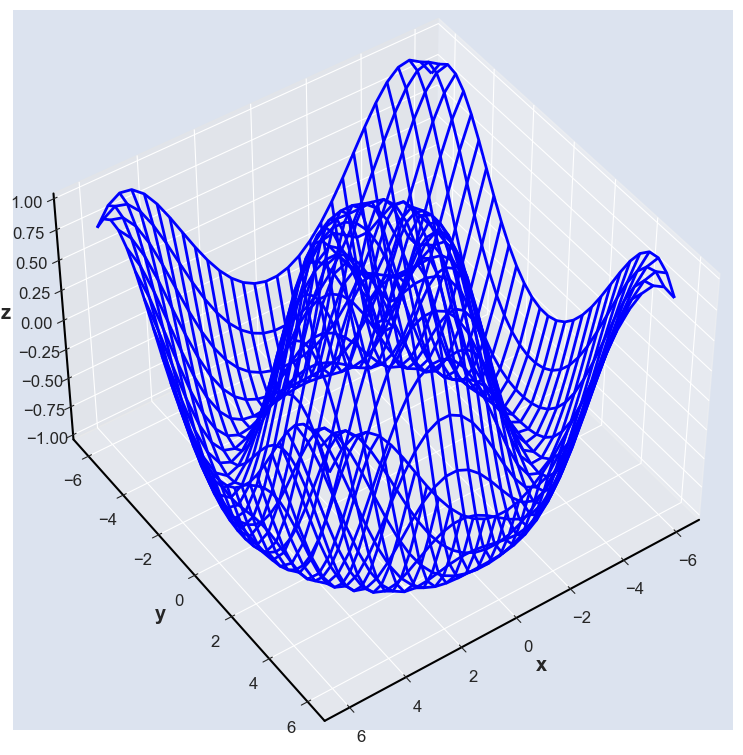

In [171]:
fig = plt.figure(figsize=(16, 8), dpi=100)
axes = fig.add_axes([0.1, 0.1, 0.9, 0.9], projection="3d")

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

x, y = np.meshgrid(x, y)
z = get_z(x,y)

# change viewing angle at 45 degrees, and rotate at 55 degrees
axes.view_init(45, 55)

axes.set_xlabel("x")
axes.set_ylabel("y")
axes.set_zlabel("z")

axes.plot_wireframe(x, y, z, color="Blue")
plt.show()

### Surface Plot

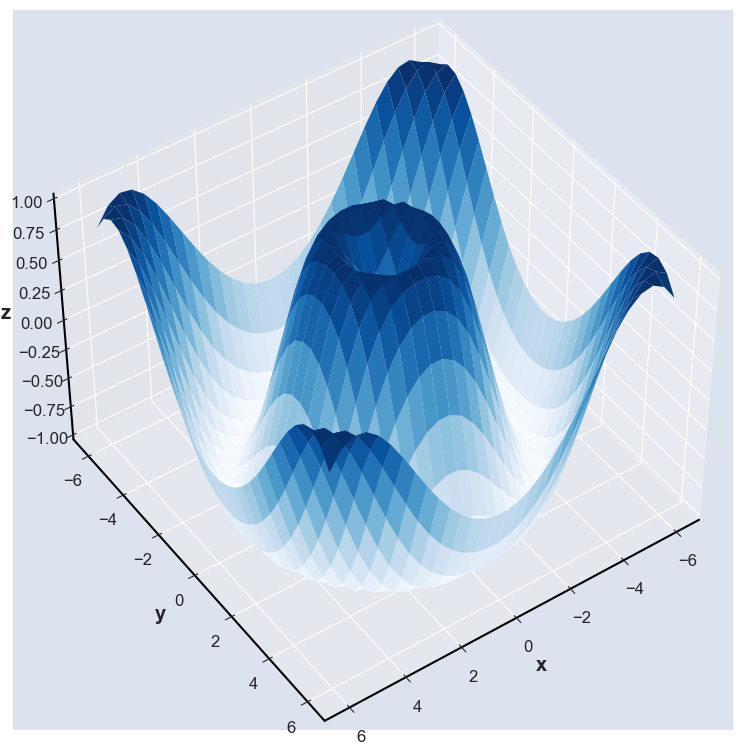

In [173]:
fig = plt.figure(figsize=(14, 8), dpi=100)
axes = fig.add_axes([0.1, 0.1, 0.9, 0.9], projection="3d")

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

x, y = np.meshgrid(x, y)
z = get_z(x,y)

# change viewing angle at 45 degrees, and rotate at 55 degrees
axes.view_init(45, 55)

axes.set_xlabel("x")
axes.set_ylabel("y")
axes.set_zlabel("z")

axes.plot_surface(x, y, z, cmap="Blues")
plt.show()

## Matplotlib Finance

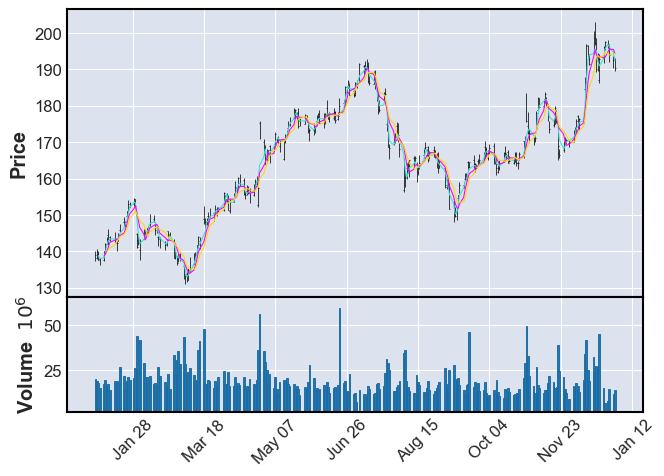

In [175]:
df = yahoo_data_sample.copy()

df.columns = [col[0] for col in df.columns]
df.index = pd.to_datetime(df.index)
df.index.name = "Date"

mpf.plot(df, type="ohlc", mav=(3, 5, 7), volume=True, show_nontrading=True)
mpf.show()

## Heatmap

* A color-coded representation of data from a 2D list

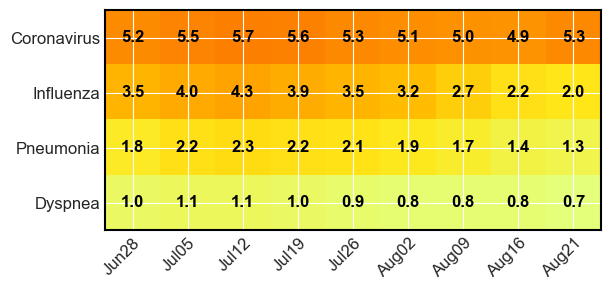

In [177]:
# represent the number of people going to the hospital due to a secific condition, overtime

symptoms = ["Coronavirus", "Influenza", "Pneumonia", "Dyspnea"]
dates =["Jun28", "Jul05", "Jul12", "Jul19", "Jul26", "Aug02", "Aug09", "Aug16", "Aug21"]
symptom_percentage = np.array([ # percentages for all the people that went to hospital
    [5.2, 5.5, 5.7, 5.6, 5.3, 5.1, 5.0, 4.9, 5.3],
    [3.5, 4.0, 4.3, 3.9, 3.5, 3.2, 2.7, 2.2, 2.0],
    [1.8, 2.2, 2.3, 2.2, 2.1, 1.9, 1.7, 1.4, 1.3],
    [1.0, 1.1, 1.1, 1.0, 0.9, 0.8, 0.8, 0.8, 0.7]
])

fig, axes = plt.subplots()
im = axes.imshow(symptom_percentage, cmap="Wistia")

axes.set_xticks(np.arange(len(dates)))
axes.set_yticks(np.arange(len(symptoms)))
axes.set_xticklabels(dates)
axes.set_yticklabels(symptoms)

plt.setp(axes.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

for i in range(len(symptoms)):
    for j in range(len(dates)):
        text = axes.text(j, i, symptom_percentage[i, j], ha="center", va="center", color="k", fontweight="bold")

plt.show()

# ML Functions

<table>
  <tr>
    <th>#</th>
    <th>Function</th>
    <th>Best For</th>
    <th>Key Advantage</th>
    <th>Limitation</th>
  </tr>
  <tr>
    <td>0</td>
    <td>Sigmoid</td>
    <td>Logistic Regression</td>
    <td>Maps to (0,1)</td>
    <td>Vanishing gradient</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Tanh</td>
    <td>Neural Networks</td>
    <td>Zero-centered</td>
    <td>Still vanishes at extremes</td>
  </tr>
  <tr>
    <td>2</td>
    <td>ReLU</td>
    <td>Deep Learning</td>
    <td>Fast & simple</td>
    <td>Dying ReLU problem</td>
  </tr>
  <tr>
    <td>3</td>
    <td>Leaky ReLU</td>
    <td>CNNs & DNNs</td>
    <td>Fixes Dying ReLU</td>
    <td>Hyperparameter tuning needed</td>
  </tr>
  <tr>
    <td>4</td>
    <td>Softmax</td>
    <td>Classification</td>
    <td>Probability outputs</td>
    <td>Computational cost</td>
  </tr>
  <tr>
    <td>5</td>
    <td>Swish</td>
    <td>Deep Learning</td>
    <td>Smooth & trainable</td>
    <td>More complex</td>
  </tr>
  <tr>
    <td>6</td>
    <td>ELU</td>
    <td>Deep Learning</td>
    <td>Helps avoid dead neurons</td>
    <td>Computationally expensive</td>
  </tr>
  <tr>
    <td>7</td>
    <td>GELU</td>
    <td>Transformer Models</td>
    <td>Smooth and differentiable</td>
    <td>More complex</td>
  </tr>
  <tr>
    <td>8</td>
    <td>SELU</td>
    <td>Self-normalizing networks</td>
    <td>Self-normalizing</td>
    <td>Sensitive to initialization</td>
  </tr>
  <tr>
    <td>9</td>
    <td>Hard Sigmoid</td>
    <td>Efficiency-critical tasks</td>
    <td>Computationally efficient</td>
    <td>Less smooth, more approximation error</td>
  </tr>
  <tr>
    <td>10</td>
    <td>Softplus</td>
    <td>Replacement for ReLU</td>
    <td>Smooth and differentiable</td>
    <td>Slower than ReLU</td>
  </tr>
  <tr>
    <td>11</td>
    <td>Maxout</td>
    <td>Generalized ReLU</td>
    <td>Can approximate any convex function</td>
    <td>Requires additional parameters</td>
  </tr>
  <tr>
    <td>12</td>
    <td>Swish-1</td>
    <td>Deep Learning</td>
    <td>Smooth, better than ReLU in some cases</td>
    <td>Computationally slower</td>
  </tr>
</table>


## Sigmoid

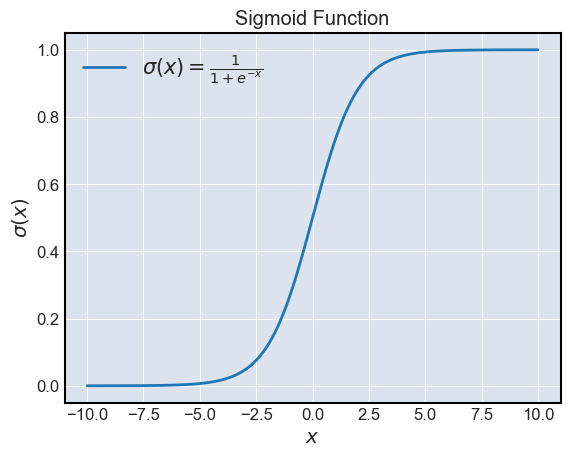

In [180]:
# Sigmoid Function
#  Usage in ML:
#    Logistic Regression → Converts outputs into probabilities
#    Neural Networks → Used as an activation function in early models
#    Probability Estimation → Maps any real number to (0,1)


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 1000)
y = sigmoid(x)

fig, ax = plt.subplots()
ax.plot(x, y, label=r"$\sigma(x) = \frac{1}{1 + e^{-x}}$")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$\sigma(x)$")
ax.set_title("Sigmoid Function")

ax.grid(True)
ax.legend(fontsize=15)
plt.show()

## Tanh

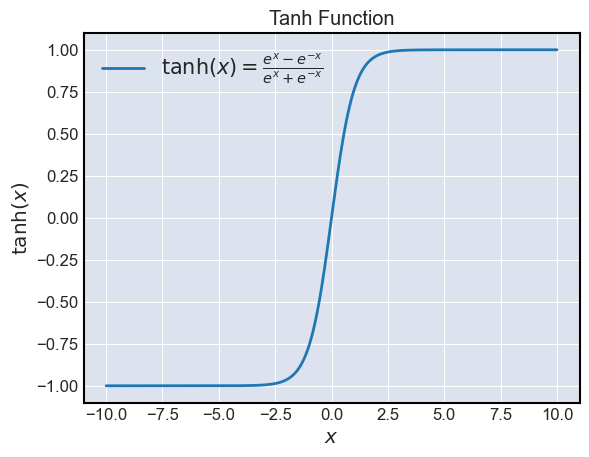

In [182]:
# Tanh function
#  Usage in ML:
#    Neural Networks → Used as an activation function
#    Better than Sigmoid → Outputs in the range (-1,1), zero-centered.

def tanh(x):
    return np.tanh(x)

y = tanh(x)

fig, ax = plt.subplots()
ax.plot(x, y, label=r"$\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$\tanh(x)$")
ax.set_title("Tanh Function")

ax.grid(True)
ax.legend(fontsize=15)
plt.show()

## ReLU

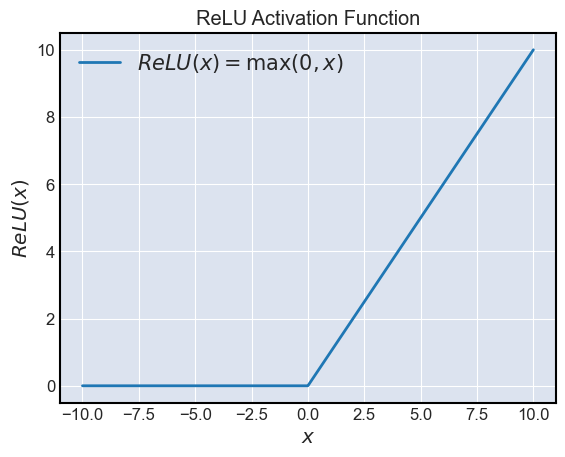

In [184]:
# Relu function
#  Usage in ML:
#    Most widely used activation function in deep learning
#    Solves vanishing gradient issue (for positive values)
#    Efficient & Simple → Faster computation

def relu(x):
    return np.maximum(0, x)

y = relu(x)

fig, ax = plt.subplots()
ax.plot(x, y, label=r"$ReLU(x) = \max(0, x)$")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$ReLU(x)$")
ax.set_title("ReLU Activation Function")

ax.grid(True)
ax.legend(fontsize=15)
plt.show()

## Leaky ReLU

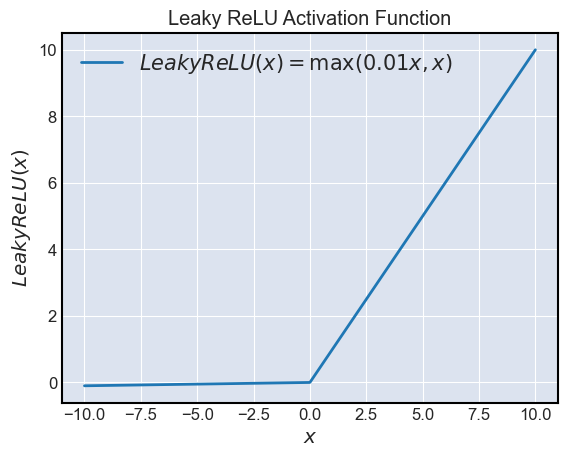

In [186]:
# Leaky_RELU function
#  Usage in ML:
#    Fixes "Dying ReLU" problem → Allows small negative gradients
#    Used in deep learning architectures for stable training

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

y = leaky_relu(x)

fig, ax = plt.subplots()
ax.plot(x, y, label=r"$LeakyReLU(x) = \max(0.01x, x)$")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$LeakyReLU(x)$")
ax.set_title("Leaky ReLU Activation Function")

ax.grid(True)
ax.legend(fontsize=15)
plt.show()

## Softmax

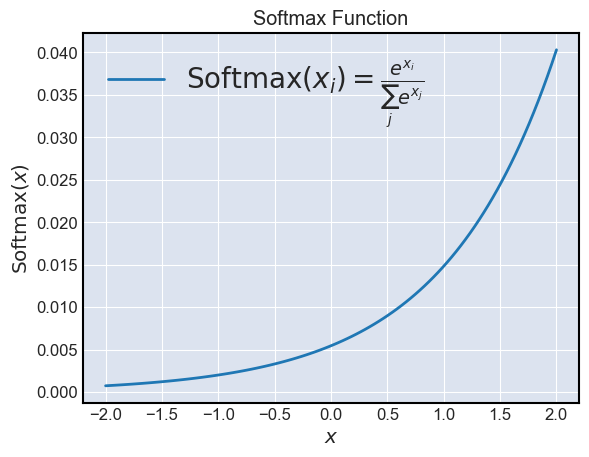

In [188]:
# Softmax function
#  Usage in ML:
#    Used in the output layer of classification models (e.g., deep learning)
#    Converts a vector into a probability distribution
#    Helps multiclass classification tasks

def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum()

x = np.linspace(-2, 2, 100)
y = softmax(x)

fig, ax = plt.subplots()
ax.plot(x, y, label=r"$\text{Softmax}(x_i) = \frac{e^{x_i}}{\sum_{j} e^{x_j}}$")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$\text{Softmax}(x)$")
ax.set_title("Softmax Function")

ax.grid(True)
ax.legend(fontsize=20)
plt.show()

## Swish

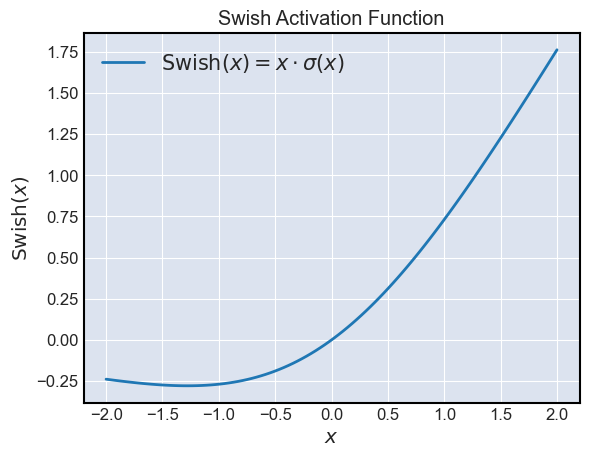

In [190]:
# Swish function
#  Usage in ML:
#  Developed by Google → Used in deep networks like EfficientNet
#  Works better than ReLU in some cases

def swish(x):
    return x * sigmoid(x)

y = swish(x)

fig, ax = plt.subplots()
ax.plot(x, y, label=r"$\text{Swish}(x) = x \cdot \sigma(x)$")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$\text{Swish}(x)$")
ax.set_title("Swish Activation Function")

ax.grid(True)
ax.legend(fontsize=15)
plt.show()

## ELU

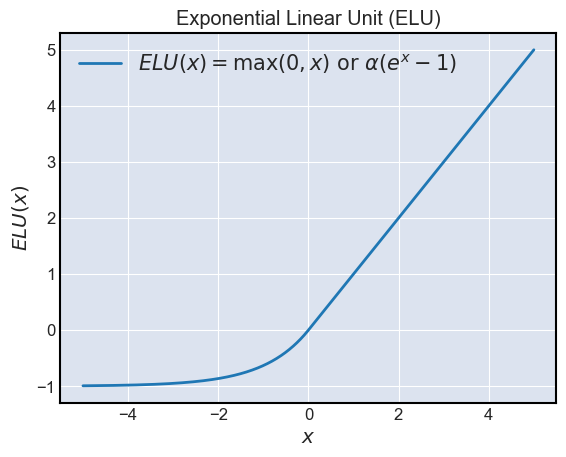

In [192]:
# ELU function
#  Best For: Deep learning
#  Key Advantage: Helps avoid dead neurons; output can be negative, making it zero-centered
#  Limitation: Computationally expensive for large datasets

def elu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

# Create a range of x values
x = np.linspace(-5, 5, 1000)

y = elu(x)

fig, ax = plt.subplots()
ax.plot(x, y, label=r"$ELU(x) = \max(0, x) \text{ or } \alpha (e^x - 1)$")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$ELU(x)$")
ax.set_title("Exponential Linear Unit (ELU)")

ax.grid(True)
ax.legend(fontsize=15)
plt.show()

## GELU

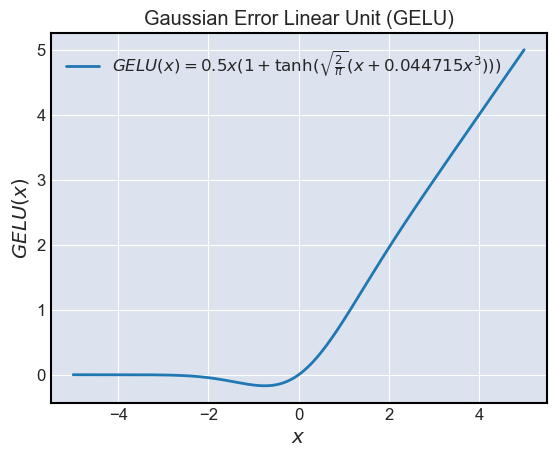

In [194]:
# GELU function
#  Best For: Transformer models (e.g., BERT, GPT)
#  Key Advantage: Smooth and differentiable; less prone to vanishing gradient
#  Limitation: More complex than ReLU, leading to slower computations

def gelu(x):
    return 0.5 * x * (1 + np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * x**3)))

y = gelu(x)

fig, ax = plt.subplots()
ax.plot(x, y, label=r"$GELU(x) = 0.5x (1 + \tanh(\sqrt{\frac{2}{\pi}} (x + 0.044715 x^3)))$")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$GELU(x)$")
ax.set_title("Gaussian Error Linear Unit (GELU)")

ax.grid(True)
ax.legend(fontsize=12)
plt.show()

## SELU

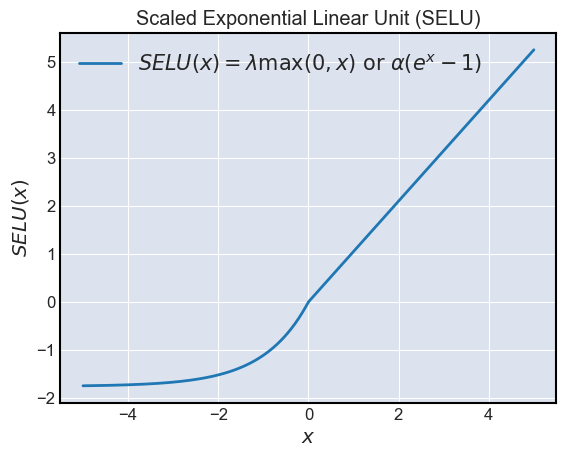

In [196]:
# SELU function
# where λ and α are specific constants.
#  Best For: Self-normalizing networks
#  Key Advantage: Self-normalizing, improving training stability
#  Limitation: Sensitive to initialization and scaling of input data


def selu(x, alpha=1.6733, lambda_=1.0507):
    return lambda_ * np.where(x > 0, x, alpha * (np.exp(x) - 1))

y = selu(x)

fig, ax = plt.subplots()
ax.plot(x, y, label=r"$SELU(x) = \lambda \max(0, x) \text{ or } \alpha (e^x - 1)$")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$SELU(x)$")
ax.set_title("Scaled Exponential Linear Unit (SELU)")

ax.grid(True)
ax.legend(fontsize=15)
plt.show()

## Hard Sigmoid

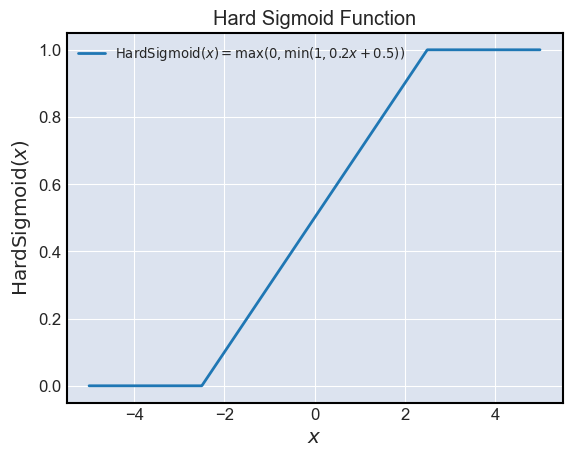

In [198]:
# Hard Sigmoid function
#  Best For: Situations where computational efficiency is critical
#  Key Advantage: Faster computation compared to the standard Sigmoid function
#  Limitation: Less smooth and more prone to approximation errors

def hard_sigmoid(x):
    return np.clip(0.2 * x + 0.5, 0, 1)

y = hard_sigmoid(x)

fig, ax = plt.subplots()
ax.plot(x, y, label=r"$\text{HardSigmoid}(x) = \max(0, \min(1, 0.2x + 0.5))$")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$\text{HardSigmoid}(x)$")
ax.set_title("Hard Sigmoid Function")

ax.grid(True)
ax.legend(fontsize=9.5)
plt.show()

## Softplus

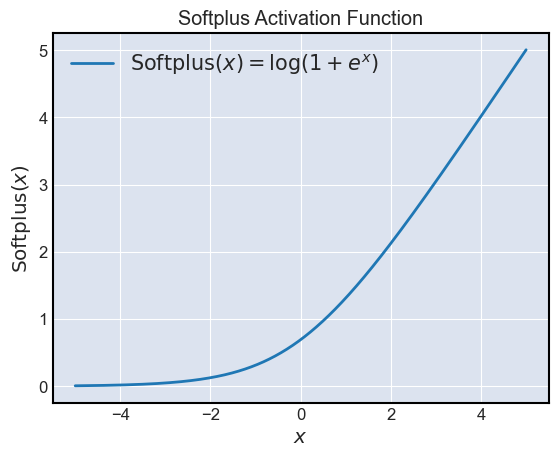

In [200]:
# Softplus function
#  Best For: Replacement for ReLU (less sparse)
#  Key Advantage: Smooth, differentiable function
#  Limitation: Slower than ReLU and computationally expensive

def softplus(x):
    return np.log(1 + np.exp(x))

y = softplus(x)

fig, ax = plt.subplots()
ax.plot(x, y, label=r"$\text{Softplus}(x) = \log(1 + e^x)$")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$\text{Softplus}(x)$")
ax.set_title("Softplus Activation Function")

ax.grid(True)
ax.legend(fontsize=15)
plt.show()